In [2]:
import os
import nibabel as nib
import matplotlib.pyplot as plt


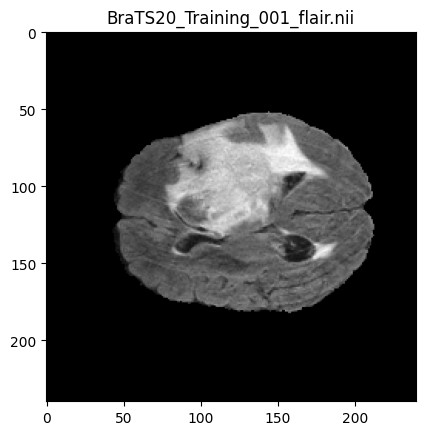

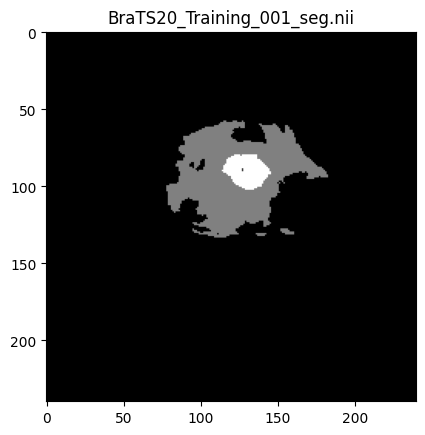

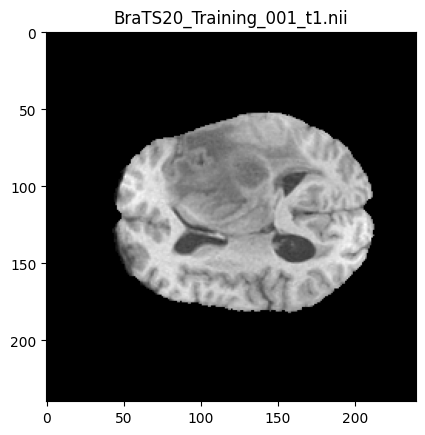

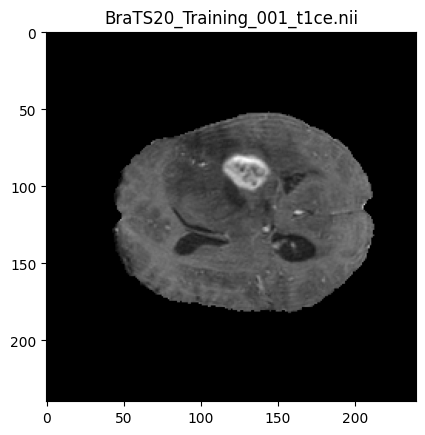

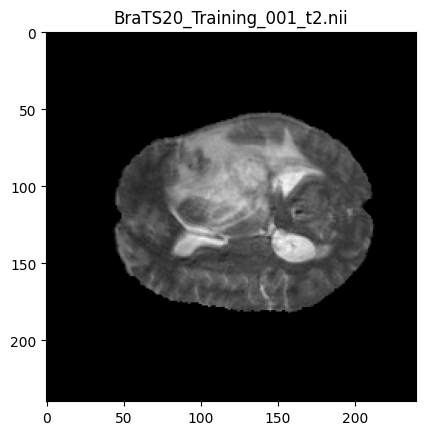

In [4]:
def display_image_from_nifti(file_path):
    img = nib.load(file_path)
    data = img.get_fdata()
    
    # Displaying a middle slice for simplicity
    slice_idx = data.shape[2] // 2
    plt.imshow(data[:, :, slice_idx], cmap='gray')
    plt.title(os.path.basename(file_path))
    plt.show()

def display_brats_folder(folder_path):
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith('.nii') or file.endswith('.nii.gz'):
                display_image_from_nifti(os.path.join(root, file))

# Path to the BRaTS training data folder
brats_folder = 'C:/BrainTumorDataset/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001'
display_brats_folder(brats_folder)


In [5]:
# Create a folder containing only t1ce images
import os
import shutil

# Define the source and target directories
source_dir = r'C:\BrainTumorDataset\MICCAI_BraTS2020_TrainingData'
target_dir = r'C:\BrainTumorDataset\BraTS20_T1CE'

# Create the target directory if it doesn't exist
if not os.path.exists(target_dir):
    os.makedirs(target_dir)

# Iterate over the directories in the source directory
for folder_name in os.listdir(source_dir):
    folder_path = os.path.join(source_dir, folder_name)
    
    # Check if it's a directory
    if os.path.isdir(folder_path):
        # Iterate over the files in the directory
        for file_name in os.listdir(folder_path):
            if 't1ce.nii' in file_name:
                # Construct full file path
                file_path = os.path.join(folder_path, file_name)
                # Construct target file path
                target_file_path = os.path.join(target_dir, f"{folder_name}_{file_name}")
                # Copy the file
                shutil.copy(file_path, target_file_path)
                print(f"Copied {file_name} to {target_dir}")

print("Copying complete.")


Copied BraTS20_Training_001_t1ce.nii to C:\Users\iansh\Documents\523Project\BrainTumorDataset\BraTS20_T1CE
Copied BraTS20_Training_002_t1ce.nii to C:\Users\iansh\Documents\523Project\BrainTumorDataset\BraTS20_T1CE
Copied BraTS20_Training_003_t1ce.nii to C:\Users\iansh\Documents\523Project\BrainTumorDataset\BraTS20_T1CE
Copied BraTS20_Training_004_t1ce.nii to C:\Users\iansh\Documents\523Project\BrainTumorDataset\BraTS20_T1CE
Copied BraTS20_Training_005_t1ce.nii to C:\Users\iansh\Documents\523Project\BrainTumorDataset\BraTS20_T1CE
Copied BraTS20_Training_006_t1ce.nii to C:\Users\iansh\Documents\523Project\BrainTumorDataset\BraTS20_T1CE
Copied BraTS20_Training_007_t1ce.nii to C:\Users\iansh\Documents\523Project\BrainTumorDataset\BraTS20_T1CE
Copied BraTS20_Training_008_t1ce.nii to C:\Users\iansh\Documents\523Project\BrainTumorDataset\BraTS20_T1CE
Copied BraTS20_Training_009_t1ce.nii to C:\Users\iansh\Documents\523Project\BrainTumorDataset\BraTS20_T1CE
Copied BraTS20_Training_010_t1ce.nii 

In [6]:
# check GPU status
! nvidia-smi

Wed Nov 15 15:13:39 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 545.84                 Driver Version: 545.84       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1050 ...  WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   60C    P8              N/A / ERR! |    484MiB /  4096MiB |      8%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [7]:
import torch
print(torch.__version__)
print(torch.version.cuda)


2.1.0+cu121
12.1


In [8]:

def display_image_dimensions(directory):
    for filename in os.listdir(directory):
        if filename.endswith('.nii') or filename.endswith('.nii.gz'):
            file_path = os.path.join(directory, filename)
            img = nib.load(file_path)
            data = img.get_fdata()
            print(f"Dimensions of {filename}: {data.shape}")


directory = r'C:\BrainTumorDataset\BraTS20_T1CE'
display_image_dimensions(directory)


Dimensions of BraTS20_Training_001_BraTS20_Training_001_t1ce.nii: (240, 240, 155)
Dimensions of BraTS20_Training_002_BraTS20_Training_002_t1ce.nii: (240, 240, 155)
Dimensions of BraTS20_Training_003_BraTS20_Training_003_t1ce.nii: (240, 240, 155)
Dimensions of BraTS20_Training_004_BraTS20_Training_004_t1ce.nii: (240, 240, 155)
Dimensions of BraTS20_Training_005_BraTS20_Training_005_t1ce.nii: (240, 240, 155)
Dimensions of BraTS20_Training_006_BraTS20_Training_006_t1ce.nii: (240, 240, 155)
Dimensions of BraTS20_Training_007_BraTS20_Training_007_t1ce.nii: (240, 240, 155)
Dimensions of BraTS20_Training_008_BraTS20_Training_008_t1ce.nii: (240, 240, 155)
Dimensions of BraTS20_Training_009_BraTS20_Training_009_t1ce.nii: (240, 240, 155)
Dimensions of BraTS20_Training_010_BraTS20_Training_010_t1ce.nii: (240, 240, 155)
Dimensions of BraTS20_Training_011_BraTS20_Training_011_t1ce.nii: (240, 240, 155)
Dimensions of BraTS20_Training_012_BraTS20_Training_012_t1ce.nii: (240, 240, 155)
Dimensions of Br

In [10]:
import scipy.ndimage

def downsample(input_dir, output_dir, new_width, new_height):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for filename in os.listdir(input_dir):
        if filename.endswith('.nii') or filename.endswith('.nii.gz'):
            file_path = os.path.join(input_dir, filename)
            img = nib.load(file_path)
            data = img.get_fdata()

            # Calculate the downsampling factor for each dimension
            height_factor = new_height / data.shape[0]
            width_factor = new_width / data.shape[1]
            downsampled_data = scipy.ndimage.zoom(data, (height_factor, width_factor, 1), order=3)  # Bicubic downsampling

            # Create a new NIfTI image from the downsampled data
            downsampled_img = nib.Nifti1Image(downsampled_data, img.affine)
            
            # Save the downsampled image
            output_path = os.path.join(output_dir, filename)
            nib.save(downsampled_img, output_path)

            print(f"Downsampled and saved: {filename}")


input_dir = r'C:\BrainTumorDataset\BraTS20_T1CE'
output_dir = r'C:\BrainTumorDataset\BraTS20_T1CE_LR'

downsample(input_dir, output_dir, new_width=128, new_height=128)

Downsampled and saved: BraTS20_Training_001_BraTS20_Training_001_t1ce.nii
Downsampled and saved: BraTS20_Training_002_BraTS20_Training_002_t1ce.nii
Downsampled and saved: BraTS20_Training_003_BraTS20_Training_003_t1ce.nii
Downsampled and saved: BraTS20_Training_004_BraTS20_Training_004_t1ce.nii
Downsampled and saved: BraTS20_Training_005_BraTS20_Training_005_t1ce.nii
Downsampled and saved: BraTS20_Training_006_BraTS20_Training_006_t1ce.nii
Downsampled and saved: BraTS20_Training_007_BraTS20_Training_007_t1ce.nii
Downsampled and saved: BraTS20_Training_008_BraTS20_Training_008_t1ce.nii
Downsampled and saved: BraTS20_Training_009_BraTS20_Training_009_t1ce.nii
Downsampled and saved: BraTS20_Training_010_BraTS20_Training_010_t1ce.nii
Downsampled and saved: BraTS20_Training_011_BraTS20_Training_011_t1ce.nii
Downsampled and saved: BraTS20_Training_012_BraTS20_Training_012_t1ce.nii
Downsampled and saved: BraTS20_Training_013_BraTS20_Training_013_t1ce.nii
Downsampled and saved: BraTS20_Trainin

In [15]:
input_dir = r'C:\BrainTumorDataset\BraTS20_T1CE'
output_dir_v2 = r'C:\BrainTumorDataset\BraTS20_T1CE_LR_v2'

downsample(input_dir, output_dir_v2, new_width=120, new_height=120)

Downsampled and saved: BraTS20_Training_001_BraTS20_Training_001_t1ce.nii
Downsampled and saved: BraTS20_Training_002_BraTS20_Training_002_t1ce.nii
Downsampled and saved: BraTS20_Training_003_BraTS20_Training_003_t1ce.nii
Downsampled and saved: BraTS20_Training_004_BraTS20_Training_004_t1ce.nii
Downsampled and saved: BraTS20_Training_005_BraTS20_Training_005_t1ce.nii
Downsampled and saved: BraTS20_Training_006_BraTS20_Training_006_t1ce.nii
Downsampled and saved: BraTS20_Training_007_BraTS20_Training_007_t1ce.nii
Downsampled and saved: BraTS20_Training_008_BraTS20_Training_008_t1ce.nii
Downsampled and saved: BraTS20_Training_009_BraTS20_Training_009_t1ce.nii
Downsampled and saved: BraTS20_Training_010_BraTS20_Training_010_t1ce.nii
Downsampled and saved: BraTS20_Training_011_BraTS20_Training_011_t1ce.nii
Downsampled and saved: BraTS20_Training_012_BraTS20_Training_012_t1ce.nii
Downsampled and saved: BraTS20_Training_013_BraTS20_Training_013_t1ce.nii
Downsampled and saved: BraTS20_Trainin

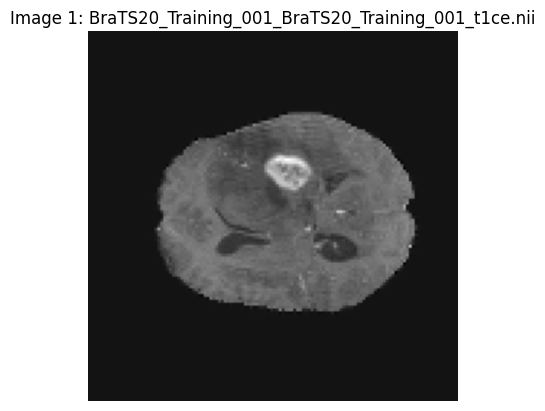

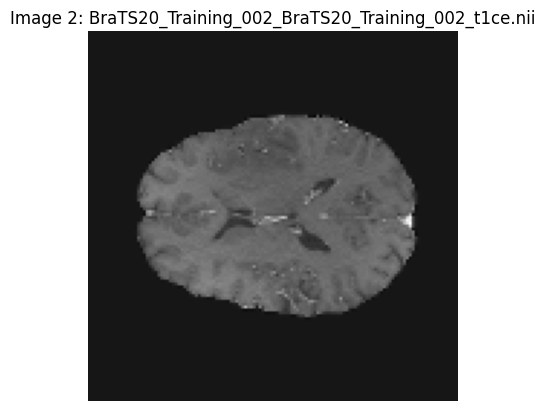

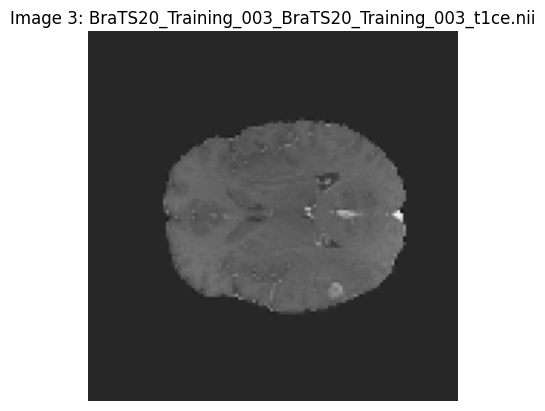

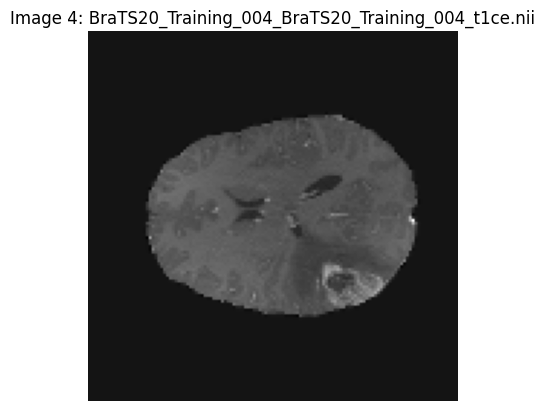

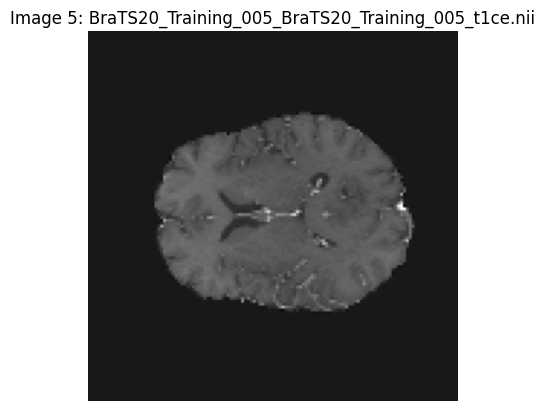

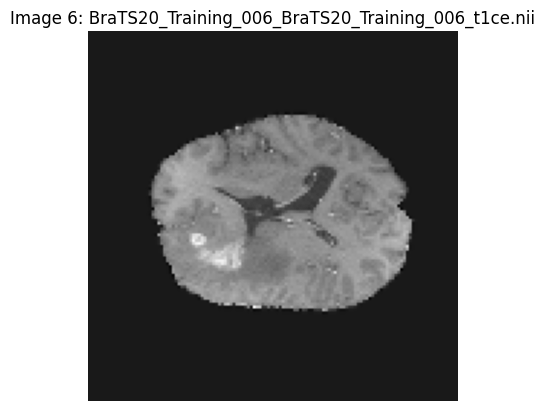

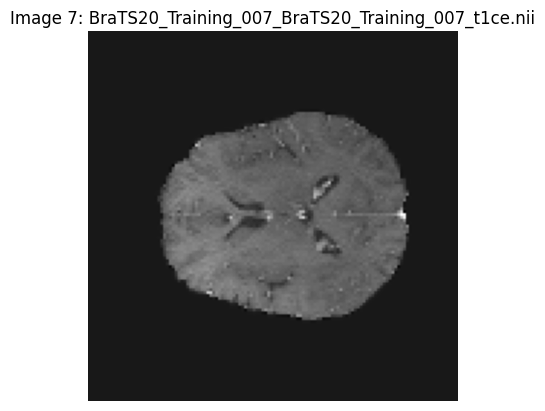

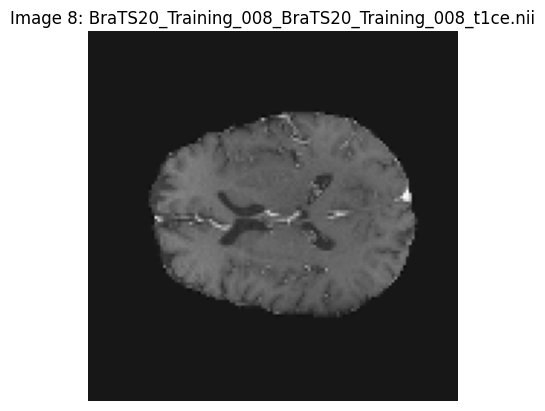

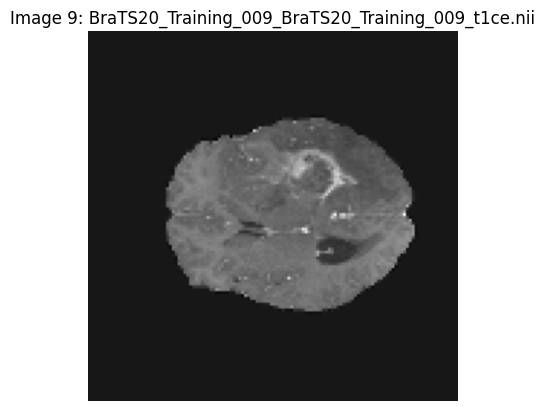

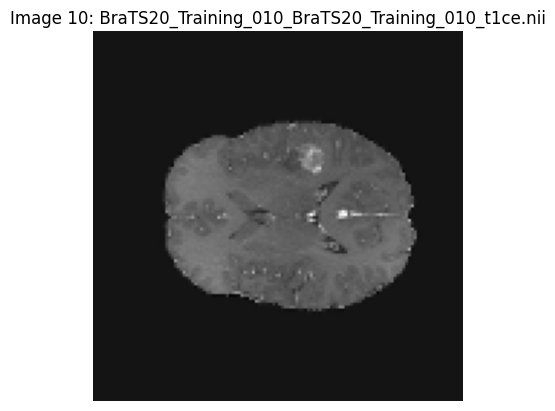

In [14]:
def display_downsampled_images(directory, num_images=10):
    files = [f for f in os.listdir(directory) if f.endswith('.nii') or f.endswith('.nii.gz')]
    files = sorted(files)[:num_images]  # Get the first 10 files

    for i, filename in enumerate(files, 1):
        file_path = os.path.join(directory, filename)
        img = nib.load(file_path)
        data = img.get_fdata()

        # Assuming the images are 3D, we'll display a middle slice
        slice_idx = data.shape[2] // 2  # Middle slice index
        plt.figure()
        plt.imshow(data[:, :, slice_idx], cmap='gray')
        plt.title(f"Image {i}: {filename}")
        plt.axis('off')
        plt.show()

display_downsampled_images(output_dir)

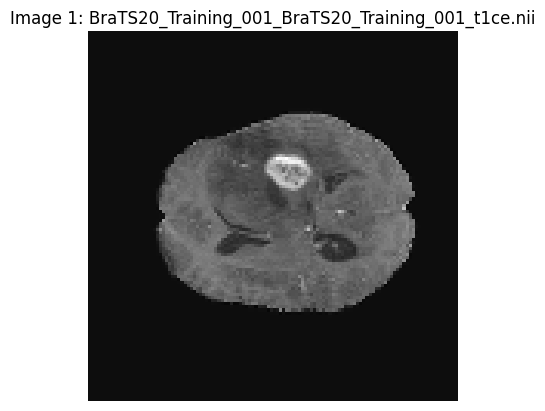

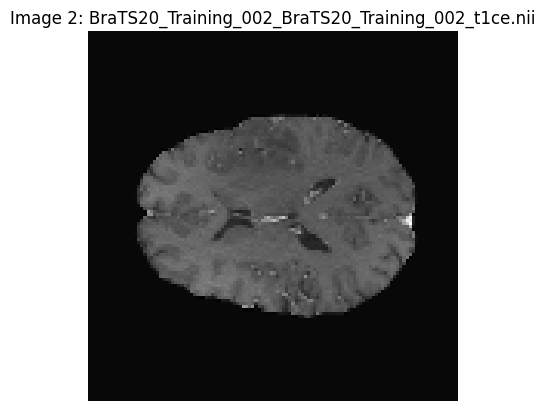

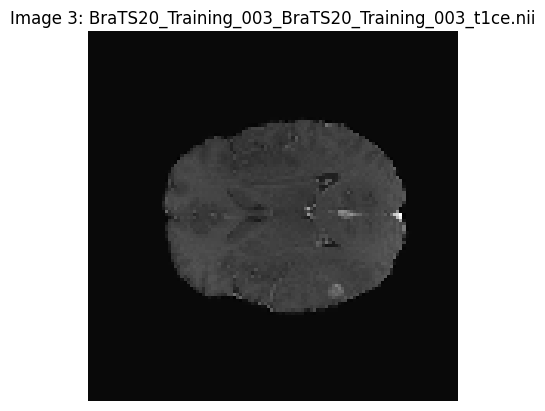

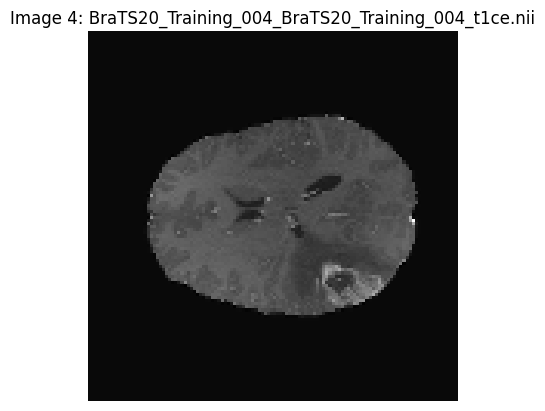

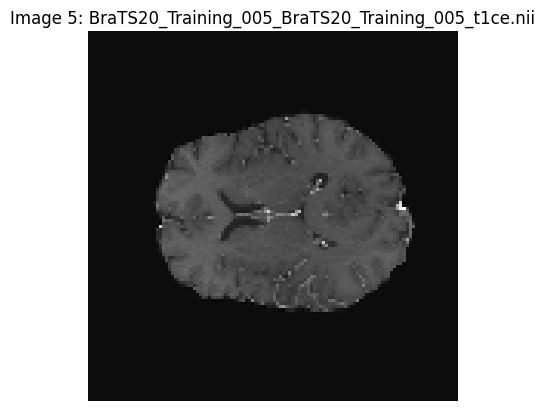

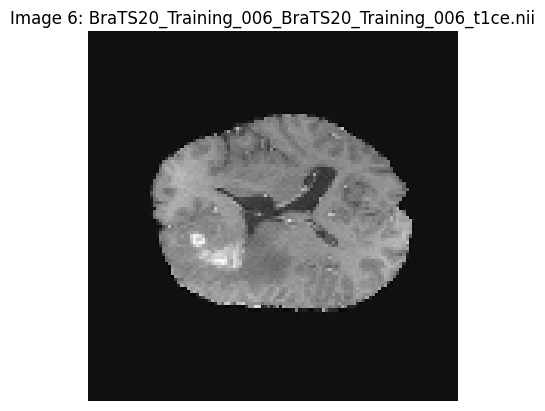

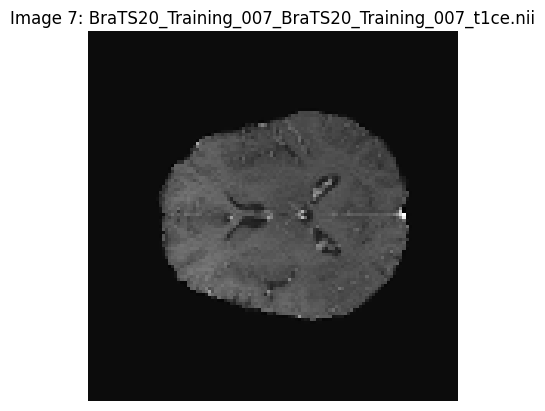

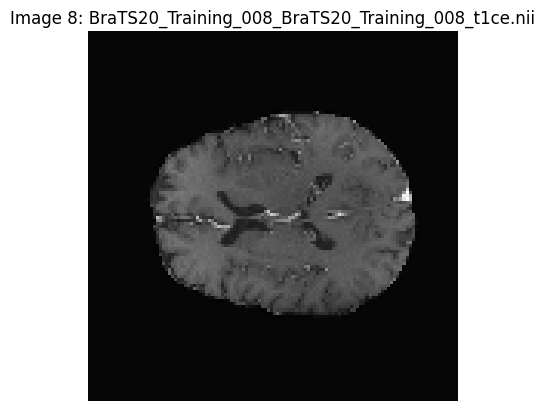

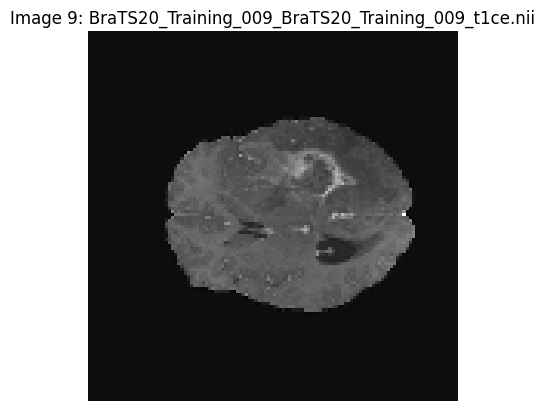

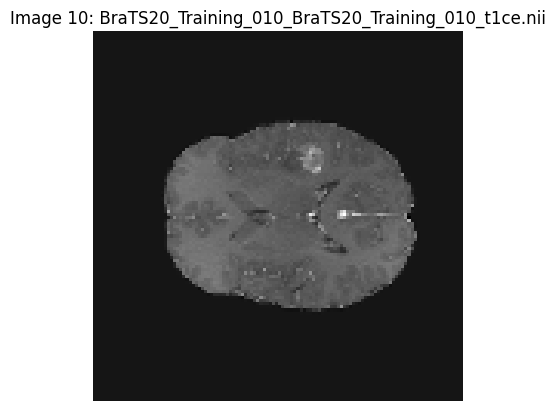

In [16]:
display_downsampled_images(output_dir_v2)